In [18]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [19]:
cdw = '/Shape_1d_256i/Shape_1d_256i'

In [20]:
os.listdir(cdw)

['AS',
 'BR',
 'CMB',
 'EM',
 'HS',
 'MQ',
 'OV',
 'PE',
 'PR',
 'PS',
 'RA',
 'RD',
 'SEM',
 'TRI']

In [21]:
dmddict = {1:'/AS',2:'/BR',3:'/CMB',4:'/EM',5:'/HS',6:'/MQ',7:'/OV',8:'/PE',9:'/PR',10:'/PS',11:'/RA',12:'/SD',13:'/SEM',14:'/TRI'}

In [22]:
d = int(input("Enter Number"))
dmd = dmddict.get(d)
dir = cdw + dmd

Enter Number8


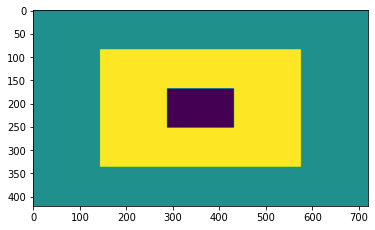

In [23]:
def init_grabcut_mask(h, w):
    mask = np.ones((h, w), np.uint8) * cv2.GC_PR_BGD
    mask[h//5:4*h//5, w//5:4*w//5] = cv2.GC_PR_FGD
    mask[2*h//5:3*h//5, 2*w//5:3*w//5] = cv2.GC_FGD
    return mask

plt.imshow(init_grabcut_mask(3*140, 3*240))

In [24]:
def add_contours(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) != 0:
        cv2.drawContours(image, contours, -1, (255, 0, 0), 3)
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0) ,2)
    


def remove_background(image,image1,n,p):
    h, w = image.shape[:2]
    mask = init_grabcut_mask(h, w)
    bgm = np.zeros((1, 65), np.float64)
    fgm = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, None, bgm, fgm, 4, cv2.GC_INIT_WITH_MASK)
    mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = cv2.bitwise_and(image, image1, mask = mask_binary)
    # add_contours(result, mask_binary) # optional, adds visualizations
    st = str(p)+'result'+str(n)+'.png'
    cv2.imwrite(st,result)
    return result



Wall time: 8.01 s


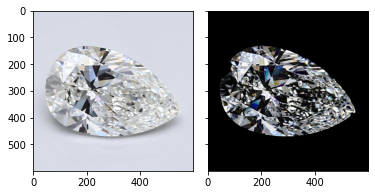

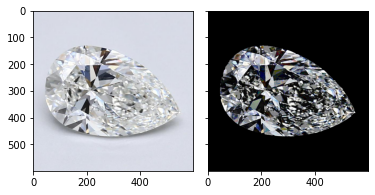

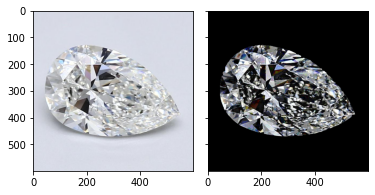

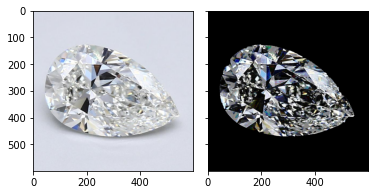

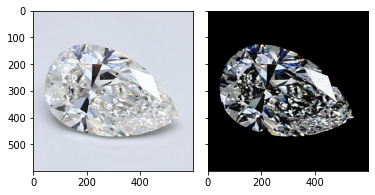

In [25]:
%%time
n = 0
dir_list = os.listdir(dir)
dir_list.sort()
for image_addr in dir_list:
    rows, cols = (1, 2)
    axes_pad = 0.2 
    fig = plt.figure()
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.2)   

    for i, ax in enumerate(grid):
        im = cv2.cvtColor(cv2.imread(dir+'/'+image_addr), cv2.COLOR_BGR2RGB)
        if i % 2 == 1:
            lab= cv2.cvtColor(im, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
            cl = clahe.apply(l)
            limg = cv2.merge((cl,a,b))
            final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
            im = remove_background(im,final,n,d)
            n+=1
        ax.imshow(im)    

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
